# Mini Project #1 Submitted by:
## Pratit Kandel (ID: 10459709)

# Part 1 – NumPy, Matplotlib/Seaborn:
Q1 (35pts): Convert covariance matrix into correlation matrix using numpy.

A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and
describe their relationship. You may use equations for clarification.


Covariance is a statistical measure that indicates the direction of linear relationship between two random variables in which a change in one variable reflects a change in the other.

A positive covariance means that both variables tend to increase or decrease together while a negative covariance suggests that when one variable increases, the other tends to decrease.

The covariance between two random variables x and y can be represented by the equation:

\begin{align}
        Cov(x,y) = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{n-1}
    \end{align}

Where,

Cov(x,y) is the covariance between x and y

$x_i$ and $y_i$ are the individual data points in variables x and y respectively

$\bar{x}$  and $\bar{y}$ are the means of x and y respectively

n = number of features

Likewise, Correlation is also a statistical measure that determines both the strength and direction of linear relationship between two random variables.

Correlation value can range from -1 to 1. A value of 1 indicates a perfect positive linear relationship (i.e. as one variable increases, the other increases proportionally). A value of -1 indicates a perfect negative linear relationship (i.e. as one variable increases, the other decreases proportionally). A value of 0 indicates no linear relationship between the variables.

Correlation is the normalized form of covariance and can be obtained from the following relation:

\begin{align}
        r_{xy} = \frac{Cov(x,y)}{\sigma_x.\sigma_y}
    \end{align}

Where,

$r_{xy}$ is the correlation between x and y

Cov(x,y) is the covariance between x and y

$\sigma_x$ and $\sigma_y$ are the standard deviations of x and y respectively

B. Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv("iris.csv")
in Pandas). 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris_data = pd.read_csv("iris.csv")
iris_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Use visualization to explore the relationship between the different features.

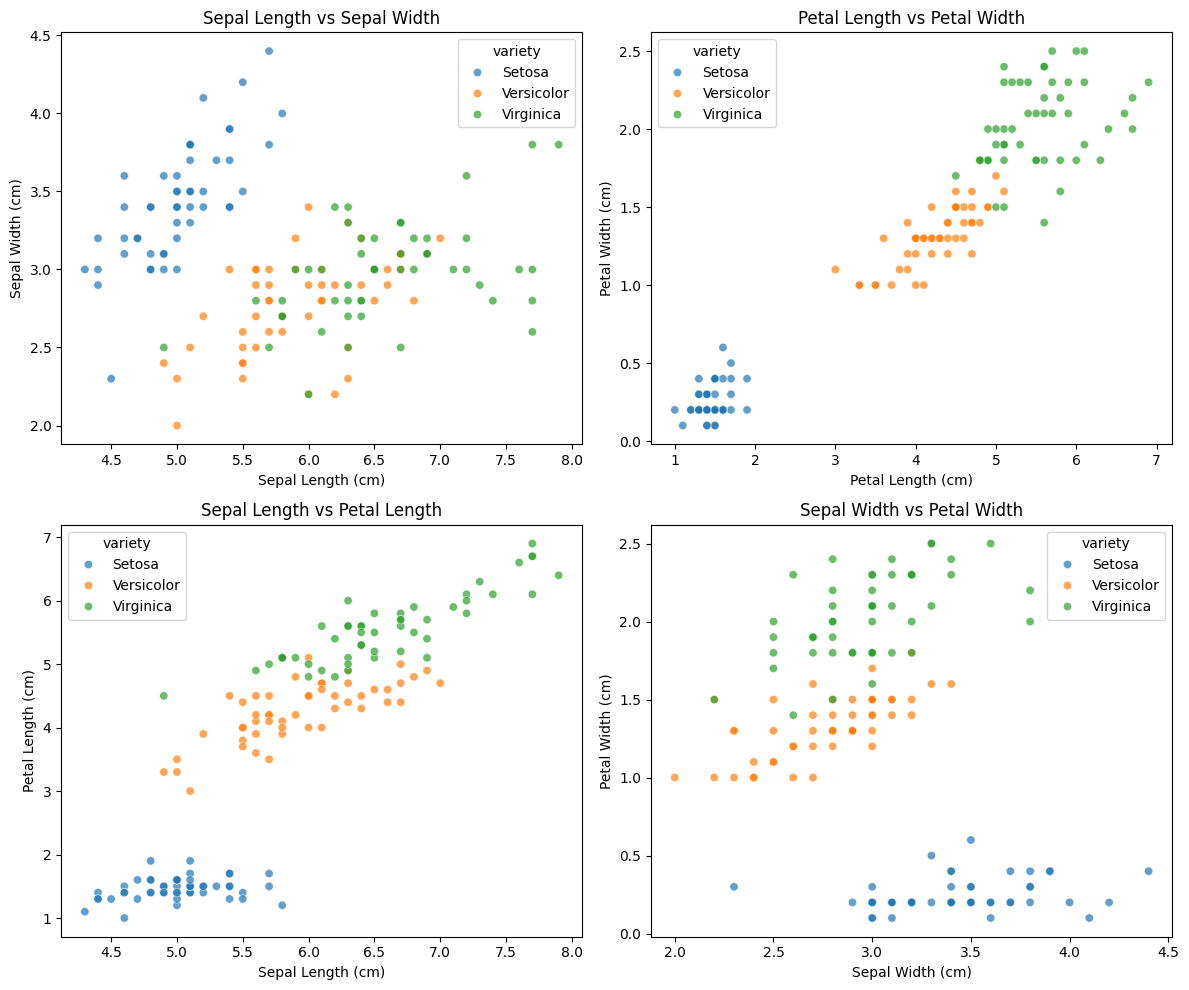

In [44]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize = (12, 10))

# Scatter plot for Sepal Length vs Sepal Width
sns.scatterplot(
    x = "sepal.length", 
    y = "sepal.width", 
    hue = "variety",
    data = iris_data, 
    ax = axs[0, 0], 
    alpha=0.7
)
axs[0, 0].set_title("Sepal Length vs Sepal Width")
axs[0, 0].set(xlabel = "Sepal Length (cm)", ylabel = "Sepal Width (cm)")

# Scatter plot for Petal Length vs Petal Width
sns.scatterplot(
    x = "petal.length", 
    y = "petal.width", 
    hue = "variety",
    data = iris_data, 
    ax = axs[0, 1], 
    alpha = 0.7
)
axs[0, 1].set_title("Petal Length vs Petal Width")
axs[0, 1].set(xlabel = "Petal Length (cm)", ylabel = "Petal Width (cm)")

# Scatter plot for Sepal Length vs Petal Length
sns.scatterplot(
    x = "sepal.length", 
    y = "petal.length", 
    hue = "variety",
    data = iris_data, 
    ax = axs[1, 0], 
    alpha = 0.7
)
axs[1, 0].set_title("Sepal Length vs Petal Length")
axs[1, 0].set(xlabel = "Sepal Length (cm)", ylabel = "Petal Length (cm)")

# Scatter plot for Sepal Width vs Petal Width
sns.scatterplot(
    x = "sepal.width", 
    y = "petal.width", 
    hue = "variety",
    data = iris_data, 
    ax = axs[1, 1],  
    alpha = 0.7
)
axs[1, 1].set_title("Sepal Width vs Petal Width")
axs[1, 1].set(xlabel = "Sepal Width (cm)", ylabel = "Petal Width (cm)")

plt.tight_layout()
plt.show()

C. Implement the following functions:

a. A function to calculate the covariance between two variables:
def calcCov(x, y)

b. A function to compute the Covariance matrix:

def covMat(data)

covMat(data) should return an n by n covariance matrix, where n is the
number of features (in case of the iris dataset n=4)


In [45]:
# Function to calculate the covariance between two variables
def calcCov(x, y):
    # Ensure both variables have the same length
    if len(x) != len(y):
        raise ValueError("x and y must have the same length.")
    
    # Calculate the mean for x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y) 
    
    # Calculate the covariance between x and y using the formula: sum((xi - x_mean) * (yi - y_mean)) / len(x)
    covariance = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y)) / (len(x) - 1)
    return covariance

# Function to compute the covariance matrix
def covMat(data):
    # Specify the number of features for the Iris dataset
    n = 4

    # Initialize an empty covariance matrix of dimensions n by n
    covariance_matrix = np.zeros((n, n))
    
    # Loop through each pair of features and compute covariance matrix
    for i in range(n):
        for j in range(n):
            covariance_matrix[i, j] = calcCov(data[:, i], data[:, j])
    
    return covariance_matrix

D. Test1: compare the results of your function with NumPy's
np.cov(data,rowvar=False) using the iris dataset.

In [46]:
# Remove the column 'variety' from the Iris dataset and extract only numeric columns
data = iris_data.drop(columns=['variety'])

# Convert the DataFrame to a NumPy array for covariance calculation
data = data.to_numpy()

# Function call for covariance matrix
cov_matrix = covMat(data)

print("The covariance matrix obtained from the function is:")
print(cov_matrix)

# Compute the covariance matrix using NumPy
numpy_cov_matrix = np.cov(data, rowvar = False)

print("\nThe covariance matrix obtained from NumPy built-in function is:")
print(numpy_cov_matrix)

The covariance matrix obtained from the function is:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

The covariance matrix obtained from NumPy built-in function is:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


If we compare the results, both the covariance matrices obtained from the function implementation and from the NumPy built-in function have respective elements with exactly same values.

E. Using your covariance function, implement a function to calculate the correlation
matrix:

def corrMat(data):

 <should use covMat(data) and return the correlation matrix>

In [47]:
# Function to compute the correlation matrix
def corrMat(data):
    # Specify the number of features for the Iris dataset
    n = 4
    
    # Initialize an empty correlation matrix of dimensions n by n
    correlation_matrix = np.zeros((n, n))
    
    # Loop through each pair of features and compute correlation matrix using covariance matrix
    for i in range(n):
        for j in range(n):
            correlation_matrix[i, j] = cov_matrix[i, j] / (np.sqrt(cov_matrix[i, i] * cov_matrix[j, j]))
    
    return correlation_matrix

F. Test2: validate your correlation matrix implementation by comparing it with the results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

In [48]:
# Function call for correlation matrix
corr_matrix = corrMat(data)

print("The correlation matrix obtained from the function is:")
print(corr_matrix)

# Compute the correlation matrix using NumPy
numpy_corr_matrix = np.corrcoef(data, rowvar = False)

print("\nThe correlation matrix obtained from NumPy built-in function is:")
print(numpy_corr_matrix)

The correlation matrix obtained from the function is:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

The correlation matrix obtained from NumPy built-in function is:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


When we compare the results, we can observe that both the correlation matrices obtained from the function implementation and from the NumPy built-in function have respective elements with exactly same values.

G. Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.

In order to visualize the tests results, we can use heatmaps to plot the covariance matrices and correlation matrices obtained from either the function implementation or NumPy in-built function since they are exactly the same.

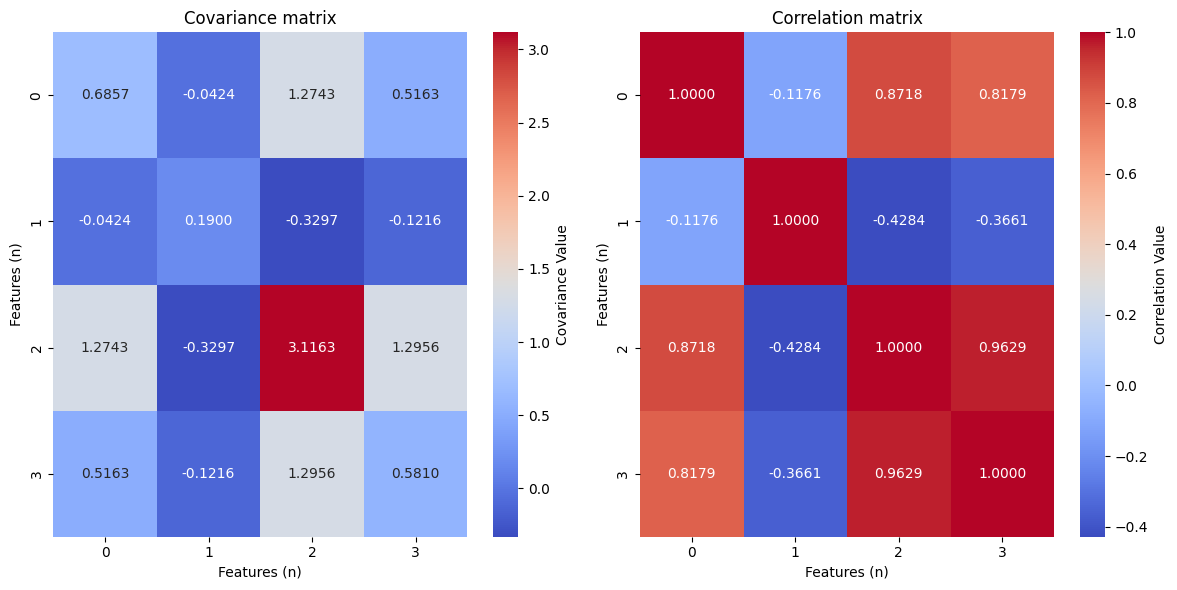

In [49]:
# Create the plots
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

# Heatmap for Covariance matrix
sns.heatmap(cov_matrix, annot = True, cmap = 'coolwarm', fmt = '.4f', ax = axs[0],
            cbar_kws = {'label': 'Covariance Value'})
axs[0].set_title('Covariance matrix')
axs[0].set(xlabel = 'Features (n)', ylabel = 'Features (n)')

# Heatmap for Correlation matrix
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.4f', ax = axs[1],
            cbar_kws = {'label': 'Correlation Value'})
axs[1].set_title('Correlation matrix')
axs[1].set(xlabel = 'Features (n)', ylabel = 'Features (n)')

plt.tight_layout()
plt.show()

# Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:
The purpose of this part is to practice using libraries that were introduced in lecture. These
libraries include pandas, numpy and matplotlib/seaborn.
Please use the git commands that you were taught while completing this project and
upload this project to your github account.
When submitting the assignment, please include the code file as well as the URL to your git
account to show us you understand navigating projects using git.

Q2 (50pts): For this question you will use the dataset titled “laptop-price – dataset.csv”.
Import the libraries mentioned above and import the dataset from your filesystem into the
code.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from filesystem into the code
df = pd.read_csv("laptop_price - dataset.csv")
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


Please write code to complete the following tasks with this dataset:

• Plot the price of all the laptops.

Since the dataset contains 1275 laptop products with their respective price details, I choose to categorize the laptop products by company along the X-axis and display their prices on the Y-axis. To visualize the distribution of prices across various companies, I utilize a 'stripplot' which allows us to see individual prices of the laptop products for each company.

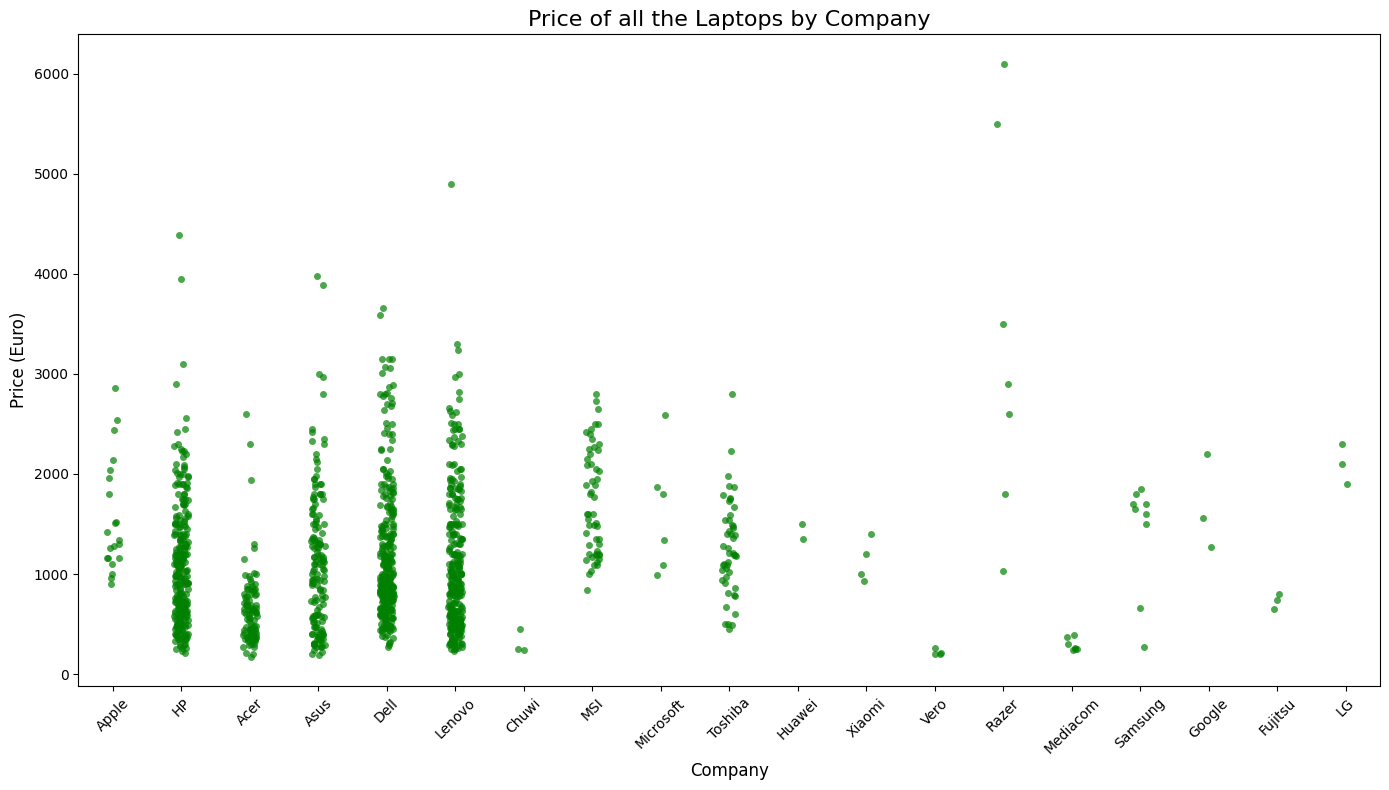

In [51]:
# Plot individual laptop prices for each company using 'stripplot'
plt.figure(figsize = (14,8))
sns.stripplot(x = 'Company', y = 'Price (Euro)', data = df, jitter = True, color = 'green', alpha = 0.7)
plt.title("Price of all the Laptops by Company", fontsize = 16)
plt.xlabel("Company", fontsize = 12)
plt.ylabel("Price (Euro)", fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()

• Which company has on average the most expensive laptop? What is the average
laptop price for each company?

In [52]:
# Group by company and calculate the average laptop price for each company
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean()

# Display titles side by side
print(f"{'Company': <15}{'Average Price (Euro)'}")

# Display average price for each company
for company, avg_price in avg_price_per_company.items():
    print(f"{company: <15}{avg_price:.2f}")

# Find the company with the highest average laptop price
max_company = avg_price_per_company.idxmax()
max_price = avg_price_per_company.max()

# Display the company that has on average the most expensive laptop
print(f"The company with the most expensive laptop is {max_company} with an average price of {max_price:.2f}")

Company        Average Price (Euro)
Acer           633.46
Apple          1564.20
Asus           1123.83
Chuwi          314.30
Dell           1199.23
Fujitsu        729.00
Google         1677.67
HP             1080.31
Huawei         1424.00
LG             2099.00
Lenovo         1093.86
MSI            1728.91
Mediacom       295.00
Microsoft      1612.31
Razer          3346.14
Samsung        1413.44
Toshiba        1267.81
Vero           217.43
Xiaomi         1133.46
The company with the most expensive laptop is Razer with an average price of 3346.14


• Find the different types of Operating systems present in the data - under the column
name "OpSys".

o Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [53]:
# Check the unique values under the column name "OpSys"
unique_op_sys = df['OpSys'].unique()
print("The different types of Operating systems before standardization are:")
for os in unique_op_sys:
    print(os)

# Standardize the operating systems to make them uniform
os_mapping = {
    'Windows 10': 'Windows',
    'Windows 10 S': 'Windows',
    'Windows 7': 'Windows',
    'macOS': 'Mac OS',
    'Mac OS X': 'Mac OS',
    'No OS': None
    }

# Create a copy of the DataFrame to avoid changes to the original dataset
ds = df.copy()

# Apply the mapping to the column
ds['OpSys'] = ds['OpSys'].replace(os_mapping)

# Drop rows with missing Operating system if needed
ds = ds.dropna(subset = ['OpSys'])

# Check the unique values under the column name "OpSys" after standardization
unique_op_sys_map = ds['OpSys'].unique()
print("\nThe different types of Operating systems after standardization are:")
for os_map in unique_op_sys_map:
    print(os_map)

The different types of Operating systems before standardization are:
macOS
No OS
Windows 10
Mac OS X
Linux
Android
Windows 10 S
Chrome OS
Windows 7

The different types of Operating systems after standardization are:
Mac OS
Windows
Linux
Android
Chrome OS


• Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

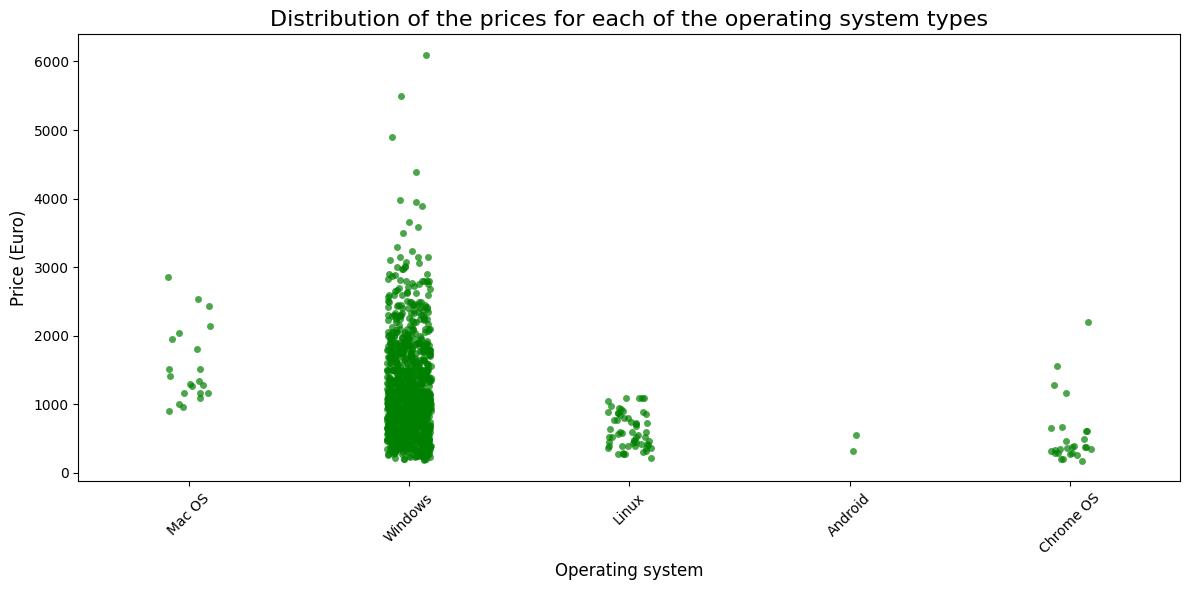

In [54]:
# Plot for the distribution of the prices against each unique operating system
plt.figure(figsize = (12, 6))
sns.stripplot(data = ds, x = 'OpSys', y = 'Price (Euro)', jitter = True, color = "green", alpha = 0.7)
plt.title("Distribution of the prices for each of the operating system types", fontsize = 16)
plt.xlabel("Operating system", fontsize = 12)
plt.ylabel("Price (Euro)", fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()

• What is the relationship between RAM and computer price? Add an adequate plot to
support your findings.

The correlation between RAM and Computer price has a coefficient of: 0.74


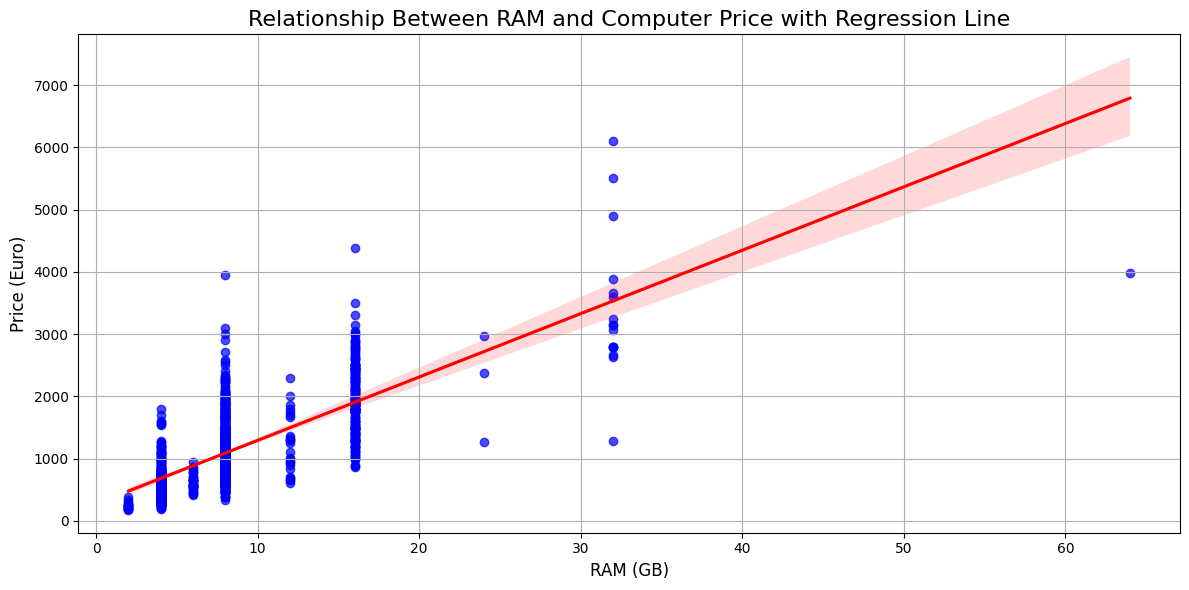

In [55]:
# Compute the correlation in order to establish relationship between RAM and Computer price
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
print(f"The correlation between RAM and Computer price has a coefficient of: {correlation:.2f}")

# Create a scatter plot with a regression line
plt.figure(figsize = (12, 6))
sns.regplot(x = 'RAM (GB)', y = 'Price (Euro)', data = df, scatter_kws = {'color': 'blue', 'alpha': 0.7}, line_kws = {'color': 'red'})
plt.title('Relationship Between RAM and Computer Price with Regression Line', fontsize = 16)
plt.xlabel('RAM (GB)', fontsize = 12)
plt.ylabel('Price (Euro)', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()

The correlation coefficient of 0.74 indicates a moderately strong positive correaltion between RAM and Computer price. Since the correlation is positive, the price of Laptop tends to increase with increase in RAM of the Computer. However, as the correlation is not perfect (i.e. coefficient = 1), there are still other factors such as screen resolution, weight, operating system, etc. that influence the price of the Laptop.
This relation has also been further demonstrated with the scatter plot and the regression line that show a clear upward trend but with some variance as data points are not perfectly aligned along the line.

• Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

o For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.


In order to create a new column with just "Storage type", the strategy is to remove the numeric value and memory size (GB/TB) from the column "Memory".

In [56]:
# Extract the "Storage type" by removing numeric values along with text specifying size (GB/TB)
df['Storage type'] = df['Memory'].str.replace(r'\d+\s?(GB|TB)', '', regex = True).str.strip()
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00,SSD
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00,SSD
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00,HDD


Q3 (15pts): Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.

Additional list of questions with suggested analyses and visualizations:

1. Is there a relationship between screen size (inches) and laptop price?

    Analysis: Compute the correlation coefficient between screen size and laptop price to determine the strength and direction of their relationship.

    Visualization: Create a scatter plot with a regression line to visually interpret the relationship between screen size and laptop price.

2. What is the variation in laptop prices for each laptop type and how are the prices distributed within each category? 

    Analysis: Categorize laptops by type and explore the price distribution within each laptop type.

    Visualization: Design a box plot to display the variation of prices for each laptop type.

3. What is the average CPU frequency (GHz) for different CPU types and how does CPU type influence the distribution of CPU frequencies?

    Analysis: Compute the average CPU frequency for each CPU type to identify the general trends.

    Visualization: Visualize using a box plot to evaluate the distribution of CPU frequencies for each CPU type.

4. Do laptop weights have any significant effects on their prices?

    Analysis: Compute the correlation coefficient between laptop weight and price to quantify the strength and direction of their relationship.

    Visualization: Use a scatterplot to visualize individual data points with weight on the x-axis and price on the y-axis along with a regression line to indicate the trend.

5. What is the average laptop weight for each company in the dataset?

    Analysis: Group laptops by company and compute the average weight for each company.

    Visualization: Use a bar chart to visualize the average laptop weight for each company.

1. Is there a relationship between screen size (inches) and laptop price?

    Implementation:

The correlation between Screen size and price has a coefficient of: 0.07


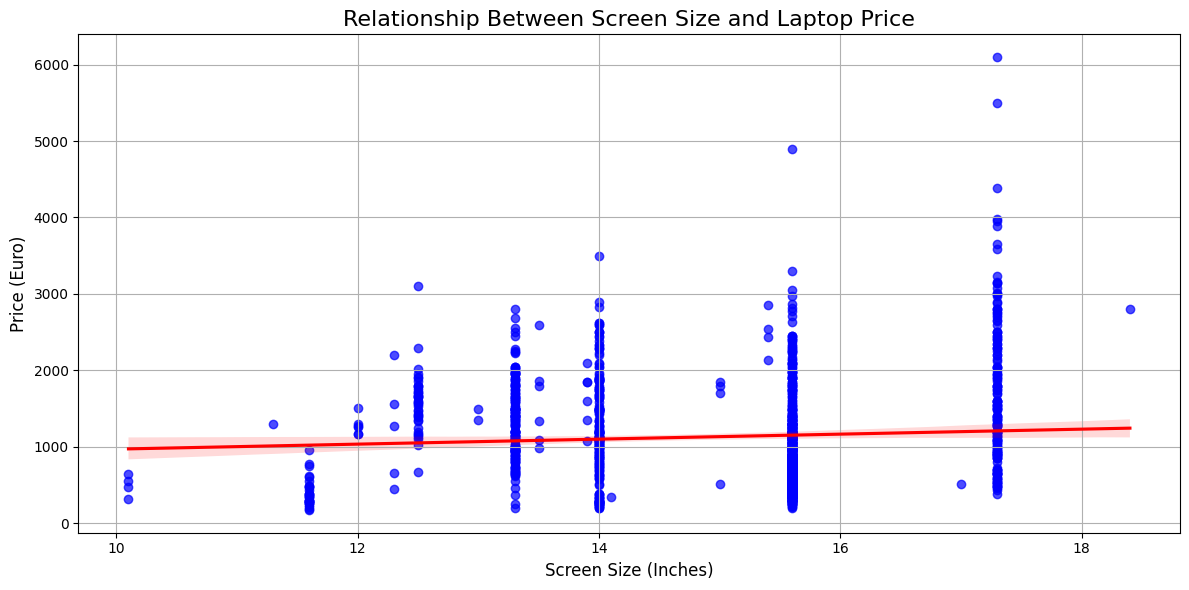

In [57]:
# Compute the correlation coefficient
corr_inch_price = df['Inches'].corr(df['Price (Euro)'])
print(f"The correlation between Screen size and price has a coefficient of: {corr_inch_price:.2f}")

# Scatter plot with regression line to visualize the relationship
plt.figure(figsize = (12, 6))
sns.regplot(x = 'Inches', y = 'Price (Euro)', data = df, scatter_kws = {'color': 'blue', 'alpha': 0.7}, line_kws = {'color': 'red'})
plt.title('Relationship Between Screen Size and Laptop Price', fontsize = 16)
plt.xlabel('Screen Size (Inches)', fontsize = 12)
plt.ylabel('Price (Euro)', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()

Hence, from the calculated correlation coefficient and regression line in the scatter plot, it is clear that there is almost no relationship between screen size and laptop price.

2. What is the variation in laptop prices for each laptop type and how are the prices distributed within each category? 

    Implementation:

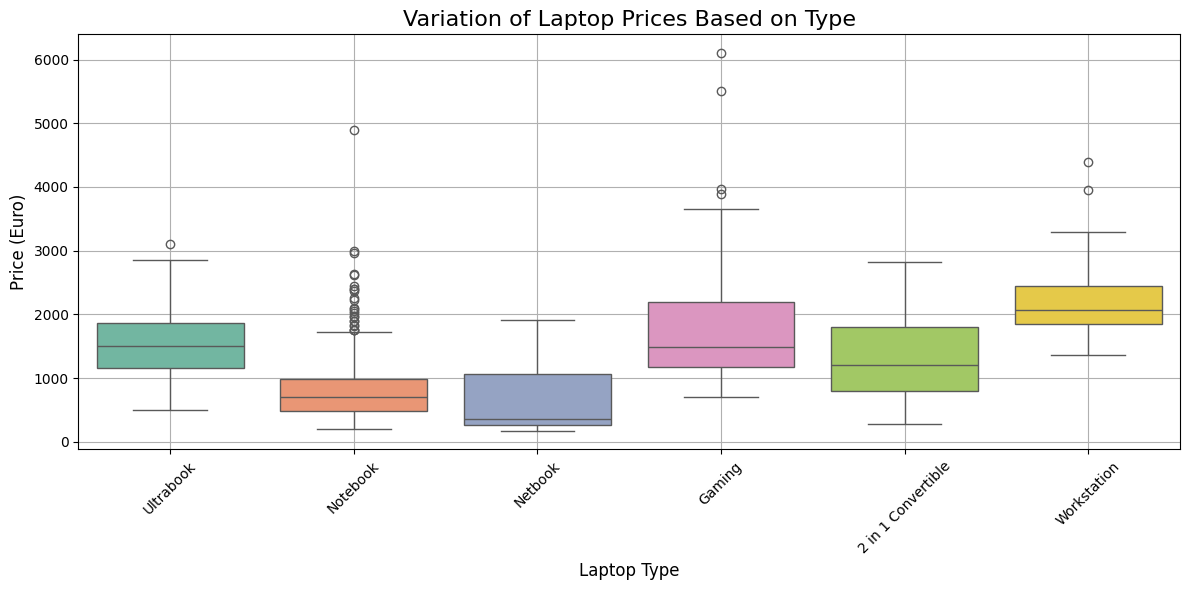

In [58]:
# Box plot to visualize the variation of laptop prices within each type
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'TypeName', y = 'Price (Euro)', hue = 'TypeName', data = df, palette = 'Set2', legend = False)
plt.title('Variation of Laptop Prices Based on Type', fontsize = 16)
plt.xlabel('Laptop Type', fontsize = 12)
plt.ylabel('Price (Euro)', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

This box plot shows the variation of laptop prices across different laptop types. Some laptop types, such as Gaming, exhibit a wide range of price variation, indicated by long whiskers and larger interquartile ranges. Other types, such as Netbook, show relatively narrow price ranges, with smaller boxes and shorter whiskers. A few outliers are visible as individual dots, representing laptops with significantly higher or lower prices compared to the rest in their category.